<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_12_M%C3%ADnimos_Cuadrados_en_2_Etapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mínimos Cuadrados en Dos Etapas (MC2E)**

Vamos a replicar los resultados del siguiente artículo:

Angrist, Joshua \& D Evans, William N, 1998. *Children and Their Parents' Labor Supply: Evidence from Exogenous Variation in Family Size*.  American Economic Review, American Economic Association, vol. 88(3), pages 450-477, June.

En este artículo se estudia el impacto de los hijos en el empleo femenino mediante dos instrumentos: 1) si acaso los dos primeros hijos de una madre son del mismo sexo (`samesex`) y 2) si acaso el segundo embarazo son gemelos (`twins_2`). La data que vamos a utilizar para este ejercicio es de 1980 y fue construida por Paul GoldsmithPinkham y puede encontrarla con el nombre `ang_ev_1980.dta`. Si bien no replica exactamente la muestra del paper, es bastante cercana. Los estimadores que vamos a obtener no son identicos, pero muy similares a los que se muestran en el paper.

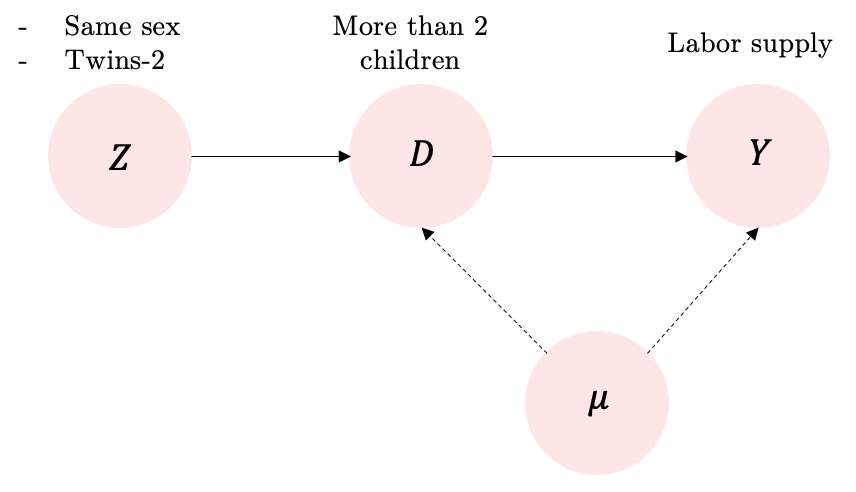

Entre las variables de resultado tenemos los siguientes outcomes laborales: i) binaria que identifica si la persona trabajo la semana anterior; ii) número de semanas trabajadas; iii) horas trabajadas a la semana; iv) ingresos relativos al trabajo; y v) logaritmo de los ingresos familiares. 

Existen dos variables endógenas: i) número de hijos que tiene la personas; ii) una variable binaria que identifica si la persona tiene más de dos hijos. 

**¿Por qué nos interesa estimar el impacto de los hijos en la participación laboral femenina?**

Nos ayuda a entender hasta que punto los hijos podrían explicar la baja participación de mujeres o el gender wage gap.

Hay muchos estudios que muestran una correlación negativa entre fertilidad y oferta laboral para mujeres **¿Por qué no le podemos atribuir causalidad a estos resultados?**

Hay bastante razones para ceer que fertilidad y la participación laboral son decisiones conjuntas. En la práctica esto nos dice que es posible que las mujeres que no trabajan decidan tener hijos o que quienes tienen hijos decidan no trabajar. Va en ambas direcciones. También pueden explicar que las mujeres que tienen hijos son distintas a las que no los tienen, es posible que estas mujeres tengan, por ejemplo, un menor deseo de trabajar.

In [ ]:
install.packages("AER")
install.packages("memisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(AER)          # Variables instrumentales y MC2E
library(memisc)       # Realizar tablas
library(haven)        # Leer bases de datos de Stata

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Loading required package: lattice

Loading required package: MASS


Attaching package: ‘memisc’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts


The following object is masked from ‘package:base’:

    as.array




In [ ]:
# Importamos la BBDD
data_iv <- haven::read_dta("/content/ang_ev_1980.dta")
data_iv

twins_1,mom_weeks_worked,kidcount,samesex,twins_2,mom_worked,morekids,moreths,blackm,hispm,whitem
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2,0,0,0,0,0,0,0,1
0,52,2,0,0,1,0,0,0,0,1
0,30,2,0,0,1,0,0,0,0,1
0,0,2,0,0,0,0,0,0,0,1
0,0,2,0,0,0,0,1,1,0,0
0,0,3,1,0,0,1,0,0,0,1
0,22,2,1,0,1,0,1,0,0,1
0,26,3,1,0,1,1,0,0,0,1
0,40,2,0,0,1,0,0,0,0,1


Entonces necesitamos saber el efecto que tiene tener hijos del mismo sexo (`samesex`) sobre un tercer hijo (`morekids`) y sobre la cantidad de hijos (`kidcount`).

In [ ]:
m11 <- lm(morekids ~ samesex, data=data_iv)
m12 <- lm(kidcount ~ samesex, data=data_iv)

In [ ]:
table_1 <- mtable("Modelo 1" = m11,
                  "Modelo 2" = m12,
            summary.stats = c("N", "R-squared"),
            coef.style = "default", 
            digits=3)
table_1


Calls:
Modelo 1: lm(formula = morekids ~ samesex, data = data_iv)
Modelo 2: lm(formula = kidcount ~ samesex, data = data_iv)

                 Modelo 1       Modelo 2     
               -------------  -------------  
                 morekids       kidcount     
---------------------------------------------
  (Intercept)       0.375***       2.521***  
                   (0.001)        (0.002)    
  samesex           0.059***       0.076***  
                   (0.002)        (0.003)    
---------------------------------------------
  N            402014         402014         
  R-squared         0.004          0.002     
  Significance: *** = p < 0.001;   
                ** = p < 0.01; * = p < 0.05  

Del primer modelo, podemos interpretar que las mujeres que tienen dos hijos del mismo sexo tienen en promedio un efecto positivo de 0.06 hijos más que las mujeres que no tienen dos hijos del mismo sexo. Es decir, las mujeres que tienen dos hijos del mismo sexo es más probable que tengan un tercero, en comparación con quienes tienen dos hijos de distinto sexo. 

Del segundo modelo, podemos afirmar que las mujeres que tienen hijos del mismo sexo tienen en promedio 0.076 hijos más que las mujeres que tienen hijos de sexos distintos.

## **Mínimos Cuadrados en Dos Etapas (morekids)**

Necesitamos estimar **la primera ecuación**:
\begin{gather*}
mom\_worked =\beta_{1} + \beta_{2}morekids + \epsilon_{i}
\end{gather*}

Para ello, necesitamos corregir la endogeneidad a través del método de mínimos cuadrados en dos etapas:

La primera etapa es:
\begin{gather*}
morekids =\alpha_{1} + \alpha_{2}samesex + \mu_{i}
\end{gather*}

La segunda etapa es:
\begin{gather*}
mom\_worked =\beta_{1} + \beta_{2}\hat{morekids} + \epsilon_{i}
\end{gather*}

In [ ]:
# Primera Etapa
m11 <- lm(morekids ~ samesex, data=data_iv)
data_iv$predicciones <- m11$fitted.values

# Segunda Etapa
mod23_iv <- lm(mom_worked ~ predicciones, data=data_iv)       

Alternativamente, se puede usar el comando ivreg:

In [ ]:
m23 <- ivreg(mom_worked ~ morekids | samesex, data = data_iv)

In [ ]:
table_2 <- mtable("Primera etapa" = m11,
                  "Segunda etapa" = mod23_iv,
                  "MC2E" = m23,
            summary.stats = c("N", "R-squared"),
            coef.style = "default", 
            digits=4)
table_2


Calls:
Primera etapa: lm(formula = morekids ~ samesex, data = data_iv)
Segunda etapa: lm(formula = mom_worked ~ predicciones, data = data_iv)
MC2E: ivreg(formula = mom_worked ~ morekids | samesex, data = data_iv)

                Primera etapa   Segunda etapa        MC2E       
                --------------  --------------  --------------  
                   morekids       mom_worked      mom_worked    
----------------------------------------------------------------
  (Intercept)        0.3751***       0.6176***       0.6176***  
                    (0.0011)        (0.0107)        (0.0106)    
  samesex            0.0595***                                  
                    (0.0015)                                    
  predicciones                      -0.1286***                  
                                    (0.0263)                    
  morekids                                          -0.1286***  
                                                    (0.0261)    
-----

Los resultados indican que tener más de dos hijos reduce la oferta laboral en 12.86 puntos porcentuales.

**La segunda ecuación es:**
\begin{gather*}
mom\_weeks\_worked =\beta_{1} + \beta_{2}morekids + \epsilon_{i}
\end{gather*}

In [ ]:
# Segunda etapa
mod24_iv <- lm(mom_weeks_worked ~ predicciones, data=data_iv) 

# Variables instrumentales
m24 <- ivreg(mom_weeks_worked ~ morekids | samesex, data = data_iv)

In [ ]:
table_3 <- mtable("Primera etapa" = m11,
                  "Segunda etapa" = mod24_iv,
                  "MC2E" = m24,
            summary.stats = c("N", "R-squared"),
            coef.style = "default", 
            digits=4)
table_3


Calls:
Primera etapa: lm(formula = morekids ~ samesex, data = data_iv)
Segunda etapa: lm(formula = mom_weeks_worked ~ predicciones, data = data_iv)
MC2E: ivreg(formula = mom_weeks_worked ~ morekids | samesex, data = data_iv)

                Primera etapa    Segunda etapa          MC2E        
                --------------  ----------------  ----------------  
                   morekids     mom_weeks_worked  mom_weeks_worked  
--------------------------------------------------------------------
  (Intercept)        0.3751***       23.3100***        23.3100***   
                    (0.0011)         (0.4800)          (0.4758)     
  samesex            0.0595***                                      
                    (0.0015)                                        
  predicciones                       -6.1372***                     
                                     (1.1816)                       
  morekids                                             -6.1372***   
              

Los resultados indican que tener más de dos hijos reduce las semanas trabajadas (Weeks worked) en alrededor de 6.1372 semanas.

Además, como se puede comprobar en ambas tablas, los coeficientes estimados son idénticos, sin embargo, los errores estándar son distintos. Se puede apreciar que todos los errores estándar son mayores estimando por 2SLS de manera secuencial (manual) que usando la función `ivreg`. 

Cabe resaltar que los errores estándar obtenidos por 2SLS secuencialmente (manualmente) son incorrectos ya que en el término de error de la segunda etapa se incluye también el error de la etapa anterior. Esto no ocurre cuando realizamos la estimación del modelo haciendo uso de la función `ivreg` ya que está programada para hacer el 2SLS corrigiendo este problema.

## **Mínimos Cuadrados en Dos Etapas (twins_2)**

In [ ]:
# Modelo con variable instrumental de gemelos
m83 <- ivreg(mom_worked ~ morekids | twins_2, data = data_iv)
m84 <- ivreg(mom_weeks_worked ~ morekids | twins_2, data = data_iv)

In [ ]:
table_4 <- mtable("Mom Worked" = m83,
                  "Mom Weeks Worked" = m84,
            summary.stats = c("N", "R-squared"),
            coef.style = "default", 
            digits=4)
table_4


Calls:
Mom Worked: ivreg(formula = mom_worked ~ morekids | twins_2, data = data_iv)
Mom Weeks Worked: ivreg(formula = mom_weeks_worked ~ morekids | twins_2, data = data_iv)

                 Mom Worked    Mom Weeks Worked  
               --------------  ----------------  
                 mom_worked    mom_weeks_worked  
-------------------------------------------------
  (Intercept)       0.5965***       22.1760***   
                   (0.0058)         (0.2587)     
  morekids         -0.0767***       -3.3380***   
                   (0.0141)         (0.6327)     
-------------------------------------------------
  N            402014           402014           
  R-squared         0.0124           0.0140      
  Significance: *** = p < 0.001;   
                ** = p < 0.01; * = p < 0.05  

En primer lugar, podemos interpretar que las mujeres que tienen más de dos hijos, tienen un efecto negativo de 0,0767 en haber trabajado el año anterior, en comparación con quienes no tienen más de dos hijos. Es decir, las mujeres que tienen más de dos hijos son menos propensas a trabajar que quienes no tienen más de dos hijos. 

En segundo lugar, podemos afirmar que las mujeres que tienen más de dos hijos trabajan en promedio 3,34 semanas menos que las mujeres que no tienen más de dos hijos. Además, cabe destacar que los efectos explorados entre la variable más de dos hijos y las variables dependientes son estadísticamente significativas. 

---

**En resumen, se puede afirmar que tener más de dos hijos disminuye la probabilidad de trabajar remuneradamente, y en caso de trabajar, que las semanas trabajadas promedios disminuyan.**